https://drive.google.com/file/d/1k-kKZScv3oIvcEF3Tk2r6F9wD1voQYfZ/view?usp=sharing - датасет в облаке

https://www.kaggle.com/datasets/thedevastator/bank-term-deposit-predictions - данные с Kaggle

**Данные представлены выше.**

Бизнес постановка задачи: какие лица будут брать срочный депозит, а какие нет.

ML-задача: анализируя различные свойства рлдбзлвателей банка, а именно - возраст, работа, семейное положение и так далее, построим модель что будет предсказывать какие люди будут брать депозит. Будем решать задачу регрессии.

Нашими метриками будут: MSE, RMSE


In [95]:
! gdown --id 1k-kKZScv3oIvcEF3Tk2r6F9wD1voQYfZ #архив в гугле

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1k-kKZScv3oIvcEF3Tk2r6F9wD1voQYfZ
To: /content/archive.zip
100% 554k/554k [00:00<00:00, 6.39MB/s]


In [96]:
! unzip /content/archive.zip #распаковка

Archive:  /content/archive.zip
  inflating: test.csv                
  inflating: train.csv               


In [97]:
import pandas as pd
import numpy as np
import seaborn as sns


from matplotlib import pyplot as plt
from matplotlib.cbook import boxplot_stats


from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [98]:
#будем игнорировать предупреждения
import warnings
warnings.simplefilter('ignore')

In [99]:
df = pd.read_csv("/content/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [100]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [101]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Мне не нравится, что получение или не пполучение депозита - y, сделаем другое имя столбца и сделаем этот признак категориальным. Sklearn - переведёт данные default, loan, housing - в категории

headers = ['age',	'job',	'marital',
           'education',	'default',	'balance',
           'housing',	'loan',	'contact'	'day',
           'month',	'duration',	'campaign',	'pdays',	'previous',
           'poutcome',	'y']

In [102]:
headers = [	'default', 'housing',	'loan',	'y']

In [103]:
for i in headers:
  df[i] = [1 if i == 'yes' else 0 for i in df[i]]

df['marital'] = [1 if i == 'married' else 0 for i in df['marital']]

In [104]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,0,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,1,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,1,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,0,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,1,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,0,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,1,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,1,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [105]:
df_test = pd.read_csv("/content/test.csv")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


<Axes: xlabel='age', ylabel='Density'>

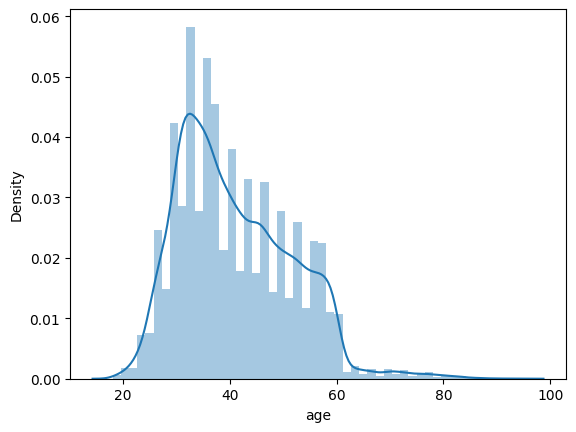

In [106]:
sns.distplot(df['age'], kde=True)

Большая часть клиентов банка в возрасте от 25  до 40 лет

<Axes: title={'center': 'Loan by job'}, ylabel='loan'>

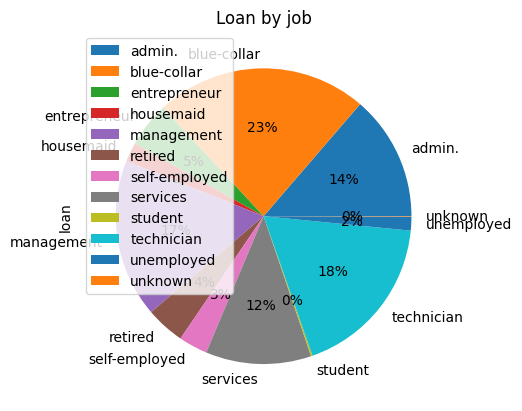

In [107]:
df.groupby(['job']).sum().plot(kind='pie', y='loan', autopct='%1.0f%%',
 title='Loan by job')

In [108]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

<Axes: title={'center': 'Loan by education'}, ylabel='loan'>

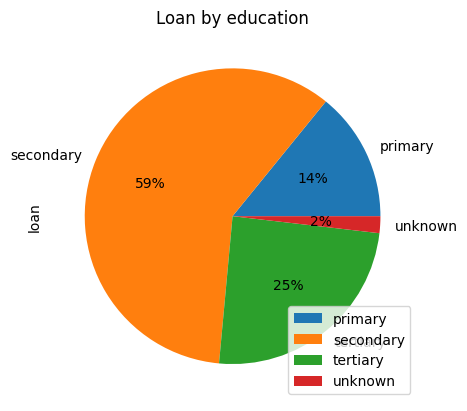

In [109]:
df.groupby(['education']).sum().plot(kind='pie', y='loan', autopct='%1.0f%%',
 title='Loan by education')

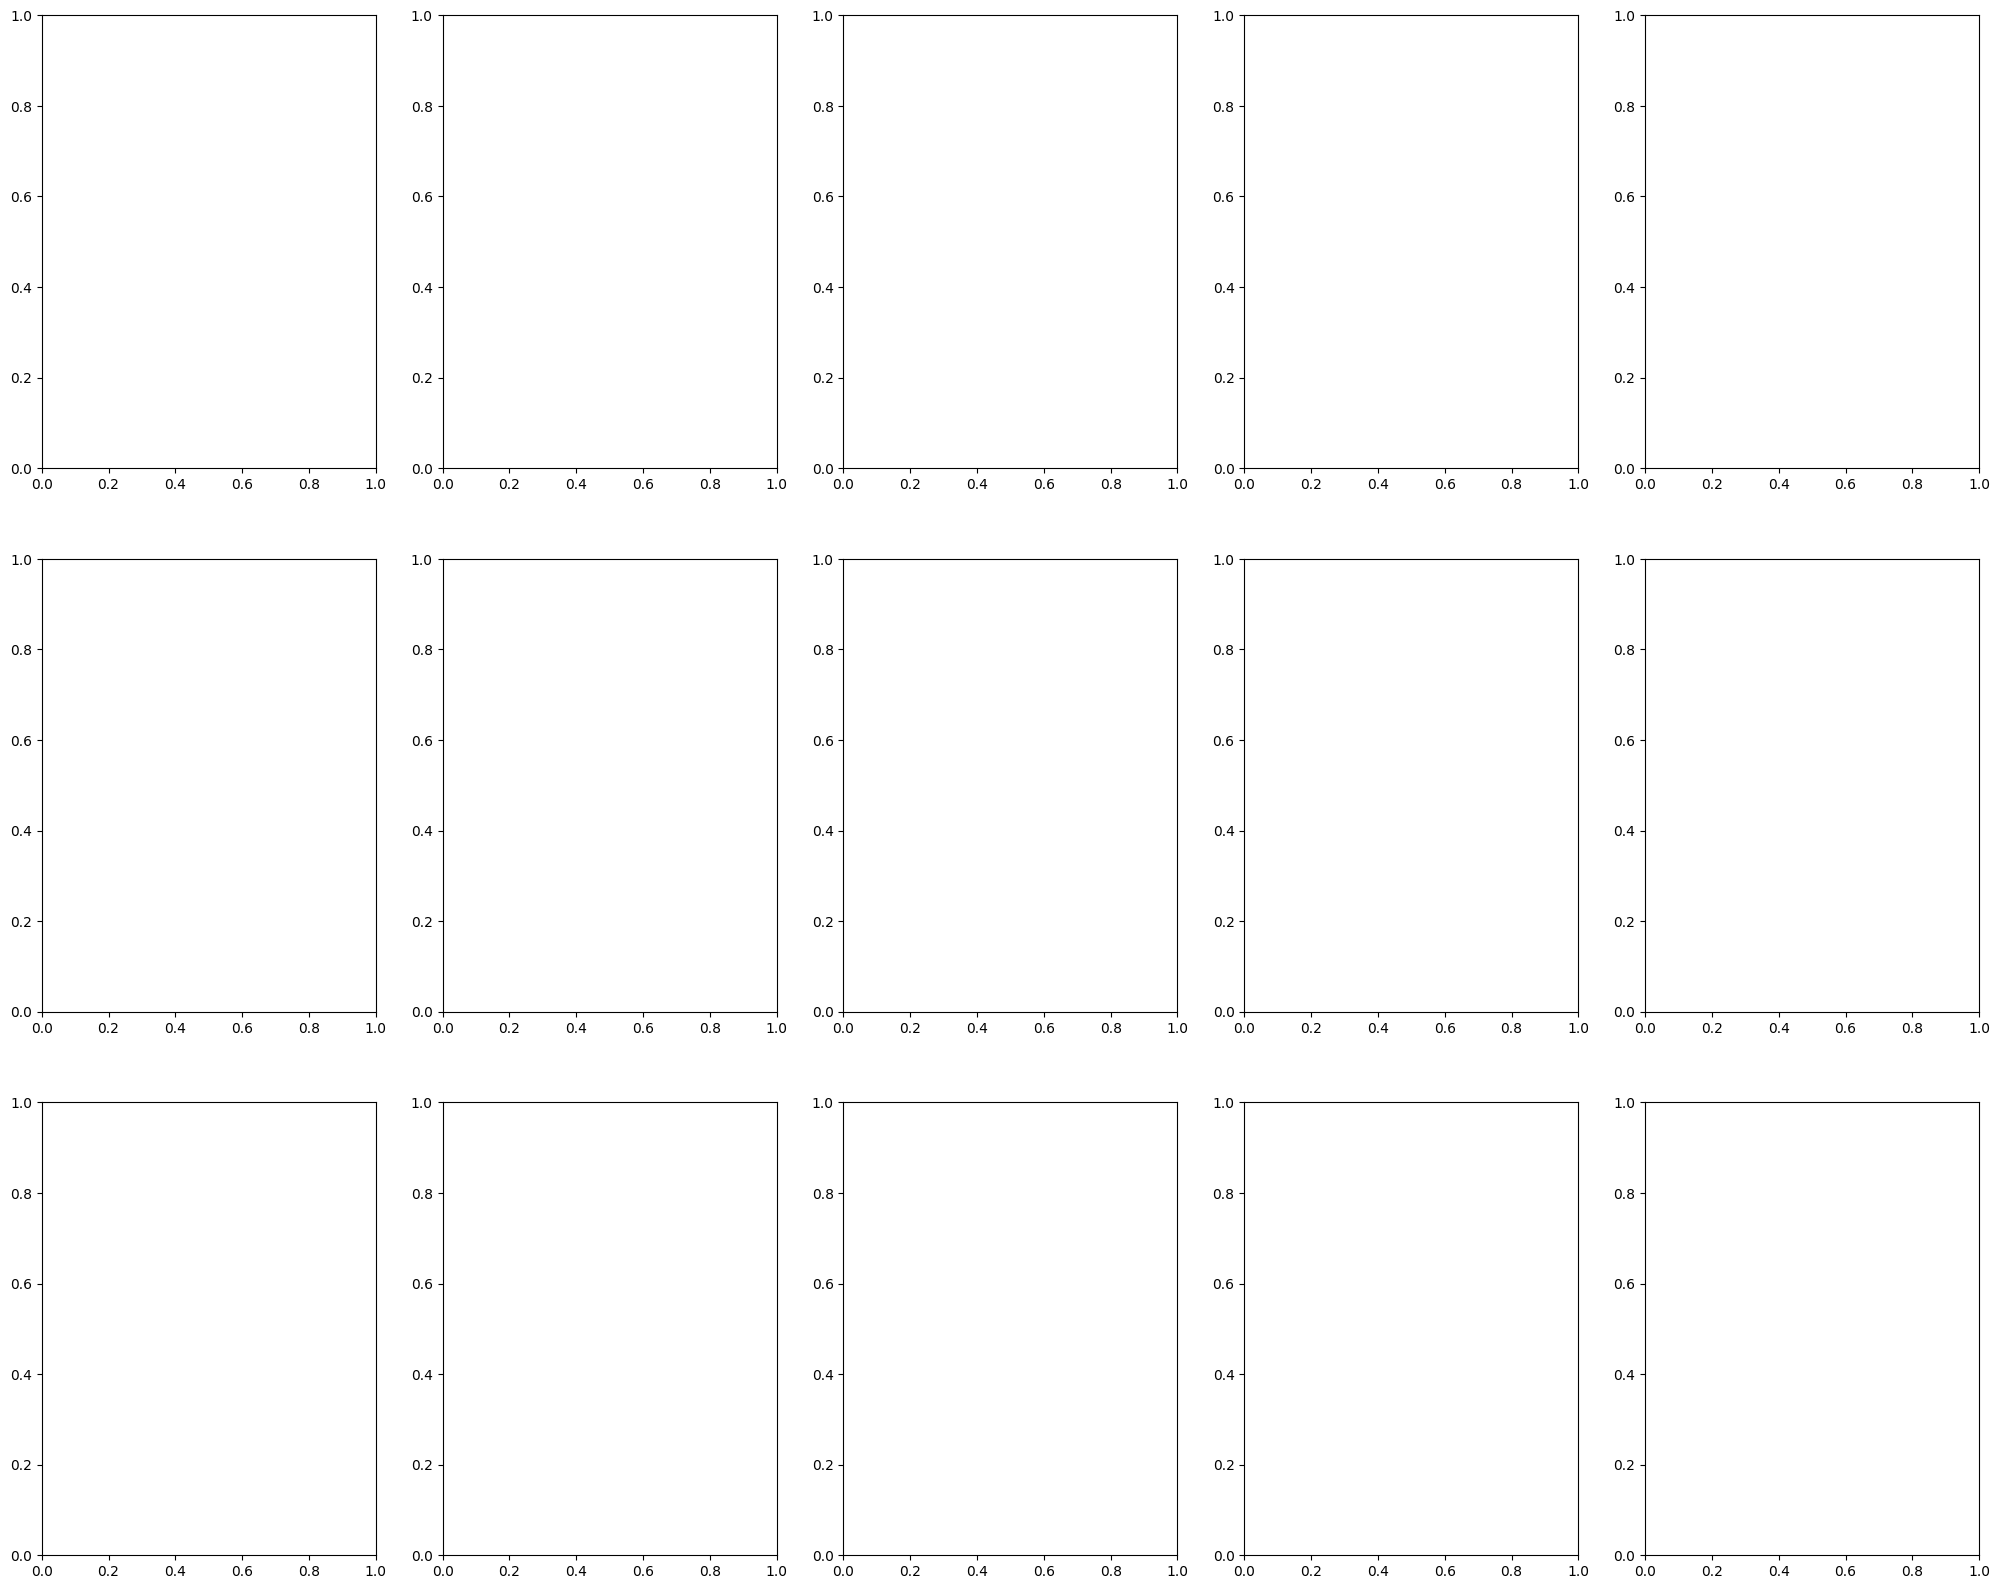

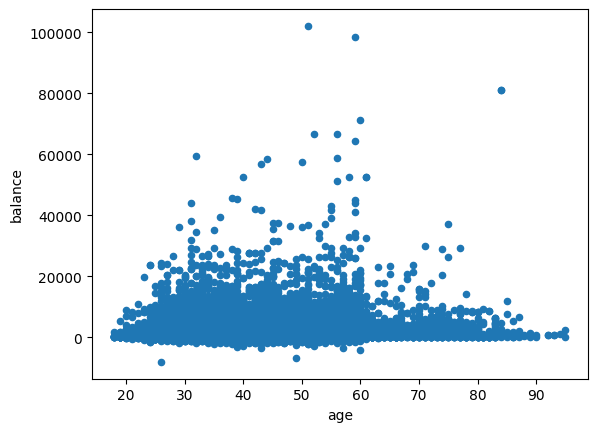

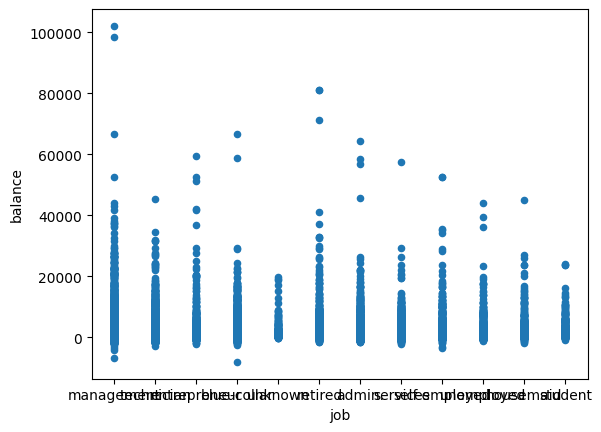

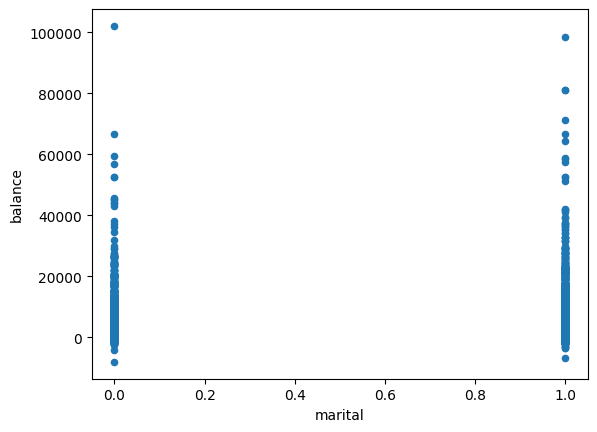

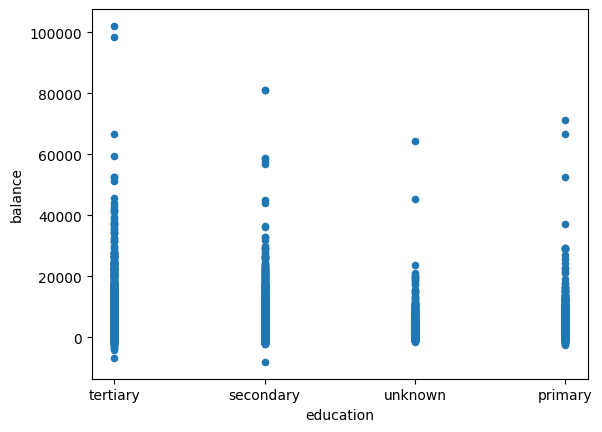

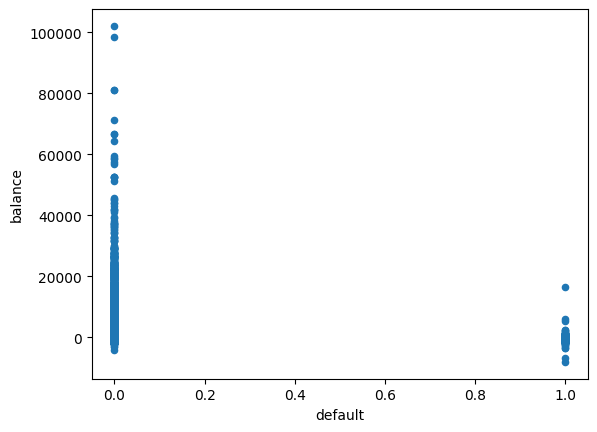

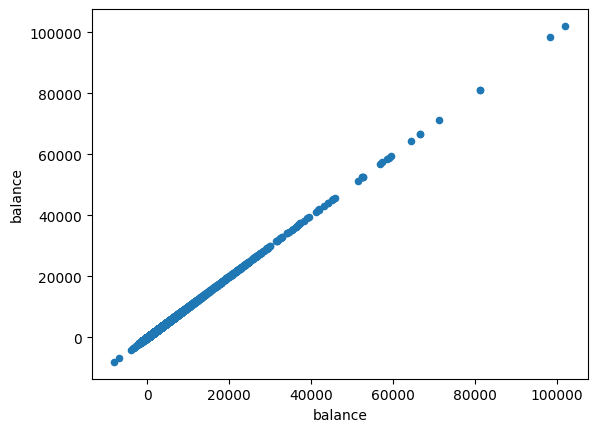

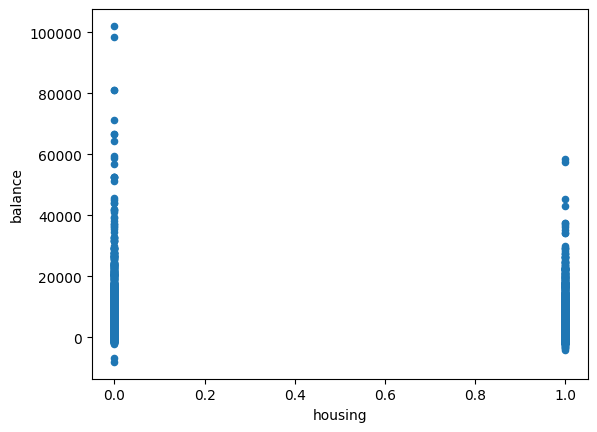

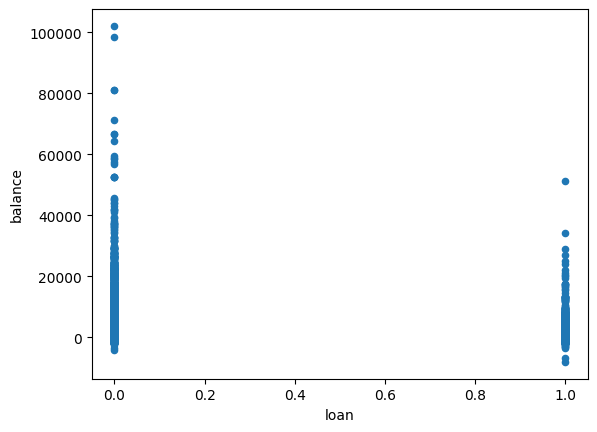

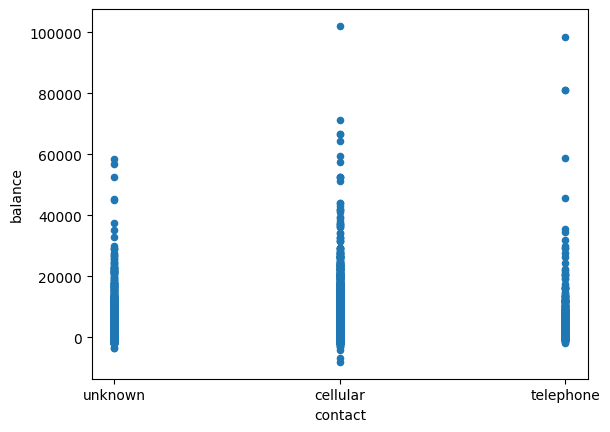

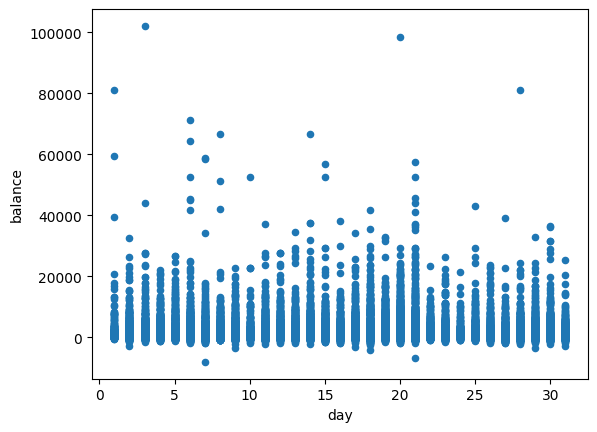

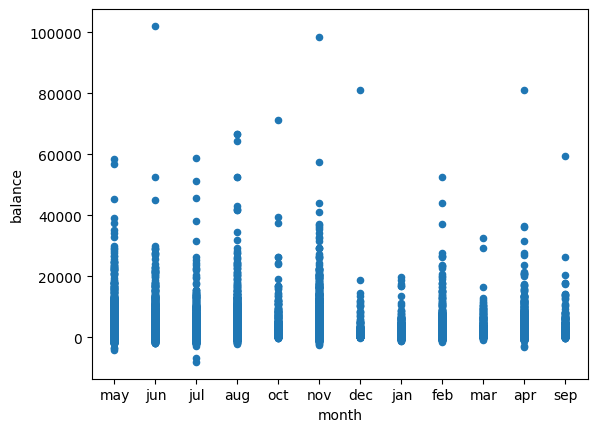

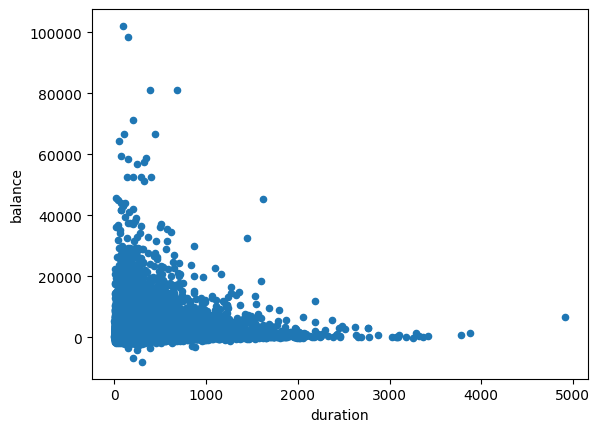

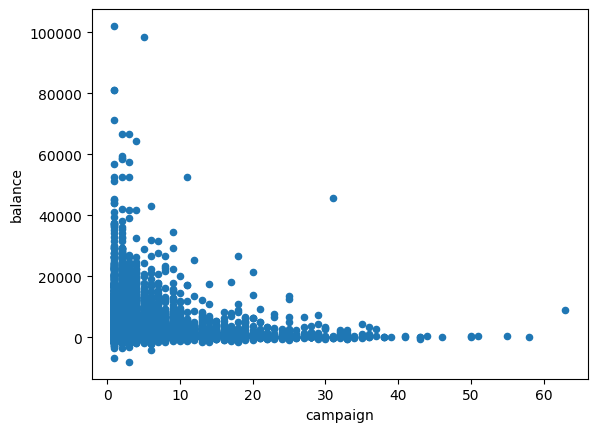

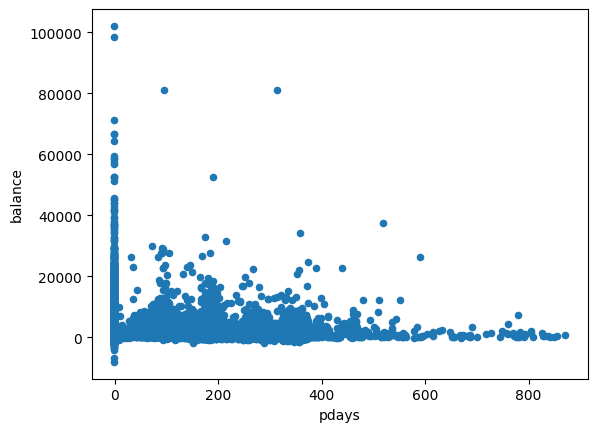

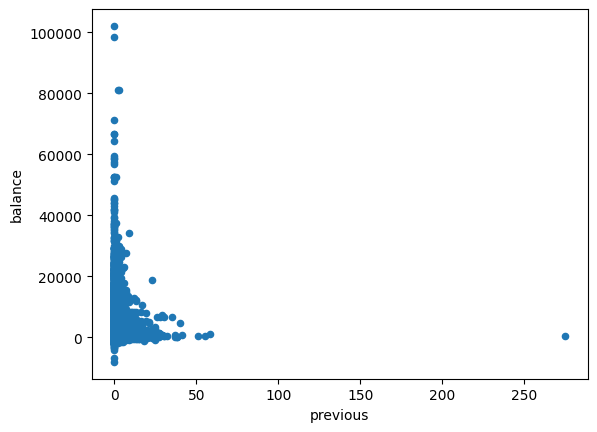

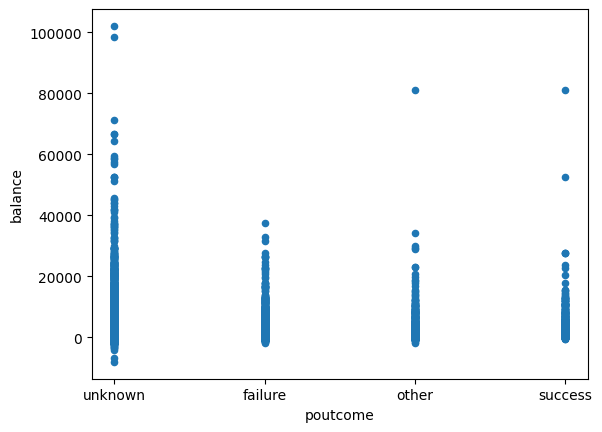

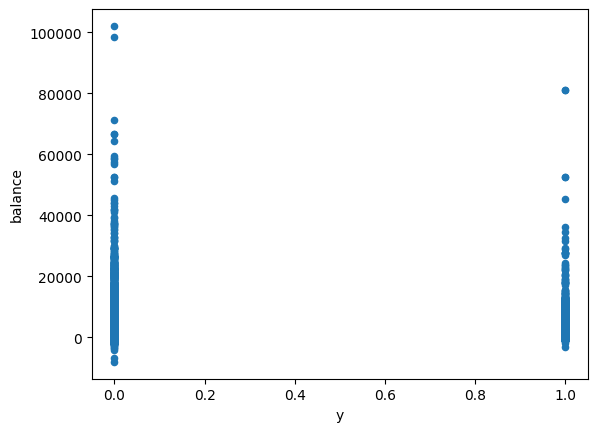

In [110]:
# посмотрим завимости данных на диаграммах рассения
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 20))
for idx, feature in enumerate(df.columns):
  df.plot(feature, 'balance', subplots=True, kind='scatter')

In [111]:
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

Посмотрим соотношение взявших и невзявших депозит

<Axes: xlabel='y', ylabel='count'>

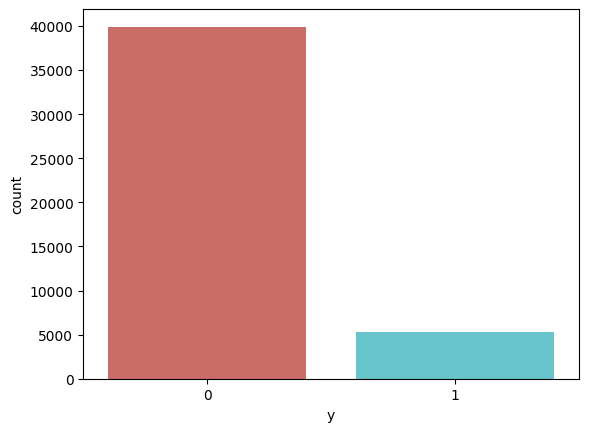

In [112]:
sns.countplot(x='y', data=df, palette='hls')

Людей, что не брали депозит намного больше, чем других

In [113]:
df.groupby('y').mean()

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,previous
y,,,,,,,,,,,
0,40.838986,0.612670,0.019112,1303.714969,0.581008,0.169330,15.892290,221.182806,2.846350,36.421372,0.502154
1,41.670070,0.520892,0.009832,1804.267915,0.365854,0.091511,15.158253,537.294574,2.141047,68.702968,1.170354


Средний возраст взявших депозит не сильно отличается от тех, кто не брал, однако те, кто взяли депозит имеют больше денег на счету и дольше не обращались в банк(pdays), однако время обращения большое(duration), но меньше обращались в банк(campaign)

In [114]:
df.groupby('marital').mean()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
marital,,,,,,,,,,,
0,37.198366,0.020392,1266.018948,0.545035,0.143579,15.733733,265.346224,2.644330,43.596155,0.616269,0.140801
1,43.408099,0.016462,1425.925590,0.562982,0.171235,15.854487,253.412765,2.842875,37.950467,0.556552,0.101235


In [115]:
df.groupby('education').mean()

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
education,,,,,,,,,,,,
primary,45.865567,0.765728,0.018537,1250.949934,0.568384,0.149467,15.421398,255.933002,2.834331,36.081740,0.489272,0.086265
secondary,39.964270,0.593483,0.019740,1154.880786,0.605034,0.185458,15.759159,258.685760,2.700802,42.353504,0.567753,0.105594
tertiary,39.593640,0.529133,0.014886,1758.416435,0.479513,0.134125,16.086535,258.518532,2.825577,39.024134,0.661980,0.150064
unknown,44.510501,0.624663,0.017232,1526.754443,0.441572,0.071621,15.810985,257.313947,2.849219,36.856220,0.488422,0.135703


In [116]:
df.groupby('job').mean()

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
job,,,,,,,,,,,,
admin.,39.289886,0.520789,0.014311,1135.838909,0.615355,0.191646,15.564301,246.896732,2.575324,47.859021,0.671630,0.122027
blue-collar,40.044081,0.715988,0.020654,1078.826654,0.724209,0.173037,15.442561,262.901562,2.816995,44.033498,0.505138,0.072750
entrepreneur,42.190989,0.719570,0.036987,1521.470074,0.584398,0.239408,15.702085,256.309348,2.799597,32.486214,0.478144,0.082717
housemaid,46.415323,0.735484,0.017742,1392.395161,0.320968,0.122581,16.002419,245.825000,2.820968,21.505645,0.371774,0.087903
management,40.449567,0.570945,0.017340,1763.616832,0.494608,0.132480,16.114189,253.995771,2.864348,38.665468,0.668006,0.137556
retired,61.626767,0.764576,0.011484,1984.215106,0.216873,0.136484,15.439488,287.361307,2.346731,37.443905,0.638693,0.227915
self-employed,40.484484,0.628879,0.020899,1647.970868,0.484484,0.145028,16.027866,268.157061,2.853072,34.747308,0.551615,0.118429
services,38.740250,0.579442,0.018055,997.088108,0.665864,0.201252,15.635532,259.318729,2.718344,41.995185,0.501204,0.088830
student,26.542644,0.057569,0.003198,1388.060768,0.265458,0.012793,14.897655,246.656716,2.299574,57.041578,0.953092,0.286780


(Text(0.5, 0, 'job'), Text(0, 0.5, 'Freguancy geting loan'))

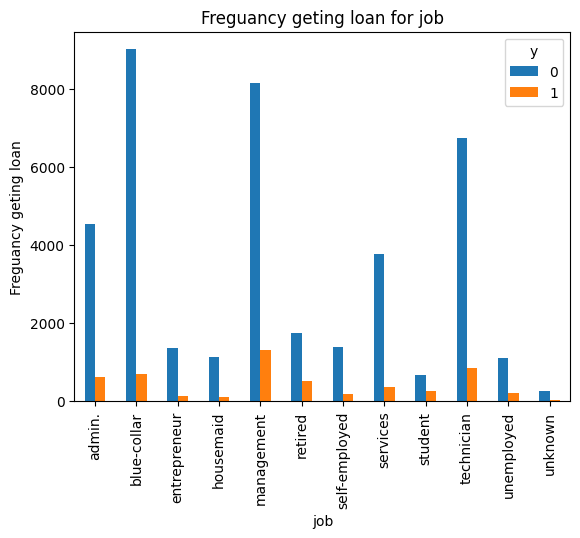

In [117]:
pd.crosstab(df['job'], df['y']).plot(kind='bar')
plt.title('Freguancy geting loan for job')
plt.xlabel('job'), plt.ylabel('Freguancy geting loan')

Видно, что частота взятия депозита зависит от должности.

In [118]:
table = pd.crosstab(df['education'], df['y'])
table

y,0,1
education,,
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1605,252


Видно, что от уровня образования зависит наличие депозита

In [126]:
cat_vars = ['job','marital','education','default','housing','loan','contact','poutcome', 'month']
for var in cat_vars:
  cat_list = 'var'+'_'+var
  cat_list = pd.get_dummies(df, columns=[var], prefix=var)

cat_vars = ['job','marital','education','default','housing','loan','contact','poutcome', 'month']
data_vars = df.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [127]:
df[to_keep].columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'y'], dtype=object)

In [ ]:
#перевёдем значение столбцов в диапазон от 0 до 1
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
print(df.head())

        age       job  marital  education  default   balance  housing  loan  \
0  0.519481  0.363636      1.0   0.666667      0.0  0.092259      1.0   0.0   
1  0.337662  0.818182      0.0   0.333333      0.0  0.073067      1.0   0.0   
2  0.194805  0.181818      1.0   0.333333      0.0  0.072822      1.0   1.0   
3  0.376623  0.090909      1.0   1.000000      0.0  0.086476      1.0   0.0   
4  0.194805  1.000000      0.0   1.000000      0.0  0.072812      0.0   0.0   

   contact       day     month  duration  campaign  pdays  previous  poutcome  \
0      1.0  0.133333  0.727273  0.053070       0.0    0.0       0.0       1.0   
1      1.0  0.133333  0.727273  0.030704       0.0    0.0       0.0       1.0   
2      1.0  0.133333  0.727273  0.015453       0.0    0.0       0.0       1.0   
3      1.0  0.133333  0.727273  0.018707       0.0    0.0       0.0       1.0   
4      1.0  0.133333  0.727273  0.040260       0.0    0.0       0.0       1.0   

     y  
0  0.0  
1  0.0  
2  0.0  
3 

<Axes: >

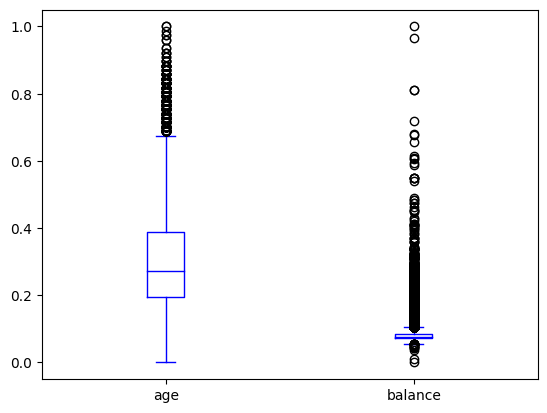

In [ ]:
df.boxplot(column=['age', 'balance'], grid=False, color='blue')

In [ ]:
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  float64
 2   marital    45211 non-null  float64
 3   education  45211 non-null  float64
 4   default    45211 non-null  float64
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  float64
 7   loan       45211 non-null  float64
 8   contact    45211 non-null  float64
 9   day        45211 non-null  float64
 10  month      45211 non-null  float64
 11  duration   45211 non-null  float64
 12  campaign   45211 non-null  float64
 13  pdays      45211 non-null  float64
 14  previous   45211 non-null  float64
 15  poutcome   45211 non-null  float64
 16  y          45211 non-null  float64
dtypes: float64(17)
memory usage: 5.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (to

Нужно посмотреть насколько данные связаны между собой

<Axes: >

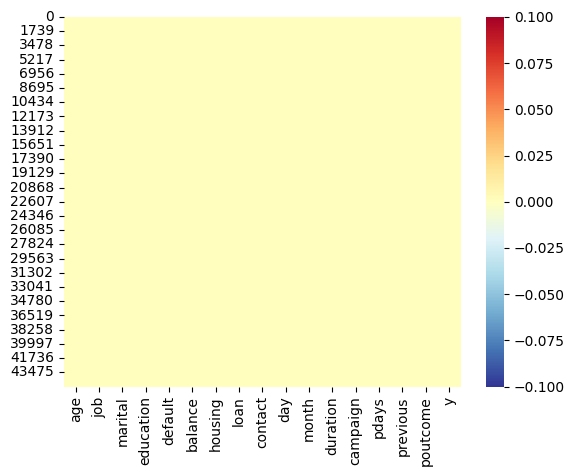

In [ ]:
sns.heatmap(df.isna(), cmap="RdYlBu_r") #нет связанных значений

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
df['education'].unique()

array([0.66666667, 0.33333333, 1.        , 0.        ])

In [ ]:
x = df["age"]
x = x.values.reshape(-1, 1)
y = df['loan']   #наверное тут нужно брать данные из другой колонки

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.25)
print(x)

NameError: ignored

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train);

In [ ]:
log_reg = LogisticrRegression()
log_reg.fit(X_train, y_train);

NameError: ignored